# Compile and Clean Data

## Import Data  
Data is stored locally, point folder variable to your local directory where all the CSV files are stored.

In [1]:
import fiona
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
pd.set_option("display.max_columns",None)

import geopandas as gpd
plt.rcParams['pdf.fonttype'] = 42


In [3]:
import pandas as pd
import os
folder = "/Users/saraeichner/Dropbox/github/FloodAnalysis/NYC OEM Monthly"
files = os.listdir(folder)
files = [i for i in files if not "meta" in i]
print(files)

['floodnet-feb-2021.csv', 'floodnet-feb-2022.csv', 'floodnet-oct-2022.csv', 'floodnet-jun-2021.csv', 'floodnet-oct-2021.csv', 'floodnet-jun-2022.csv', 'floodnet-oct-2020.csv', 'floodnet-aug-2021.csv', 'floodnet-dec-2020.csv', 'floodnet-dec-2021.csv', 'floodnet-aug-2022.csv', 'floodnet-dec-2022.csv', 'floodnet-nov-2022.csv', 'floodnet-jan-2021.csv', 'floodnet-nov-2021.csv', 'floodnet-jan-2022.csv', 'floodnet-nov-2020.csv', 'floodnet-mar-2022.csv', 'floodnet-may-2021.csv', 'floodnet-apr-2021.csv', 'floodnet-jul-2022.csv', 'floodnet-sep-2021.csv', 'floodnet-mar-2021.csv', 'floodnet-may-2022.csv', 'floodnet-apr-2022.csv', 'floodnet-jul-2021.csv', 'floodnet-sep-2022.csv']


## Iterate over CSV's to create an a single DF

In [4]:
df = pd.DataFrame()

for file_path in files:
    temp = pd.read_csv( os.path.join(folder,file_path) )
    temp['time'] = pd.to_datetime( temp['time'] )
    df = pd.concat( [df,temp ] )

df.sample(5)

time         deployment_id  depth_filt_mm  \
218508 2022-04-07 12:21:54.251000+00:00    slowly_fast_sawfly            0.0   
94875  2021-12-14 09:02:16.458152+00:00      mildly_calm_ibex            0.0   
154877 2021-11-28 09:31:52.289441+00:00      mainly_fond_boar            0.0   
63098  2021-08-13 00:41:59.126863+00:00      daily_new_falcon            0.0   
329185 2022-05-23 12:21:42.680000+00:00  openly_driven_tarpon            NaN   

        depth_proc_mm  
218508            0.0  
94875             0.0  
154877            0.0  
63098             0.0  
329185            NaN

In [5]:
#What were the deepest measures detected? 

df.nlargest(10,'depth_proc_mm')

time        deployment_id  depth_filt_mm  \
19986  2022-04-01 13:38:30.120995+00:00  evenly_divine_dingo         1590.0   
498114 2022-12-22 13:18:02.514000+00:00     early_still_frog         1579.0   
456241 2022-12-20 22:33:50.496000+00:00        duly_star_bee         1571.0   
167583 2022-01-12 08:02:50.711834+00:00      simply_pet_joey         1560.0   
168583 2022-01-12 09:37:15.312615+00:00      simply_pet_joey         1560.0   
168606 2022-01-12 09:39:21.494435+00:00      simply_pet_joey         1560.0   
167340 2022-01-12 07:39:45.212225+00:00      simply_pet_joey         1550.0   
167569 2022-01-12 08:01:47.398111+00:00      simply_pet_joey         1550.0   
169917 2022-01-12 11:41:16.983353+00:00      simply_pet_joey         1520.0   
170750 2022-01-12 13:02:04.652492+00:00      simply_pet_joey         1510.0   

        depth_proc_mm  
19986          1590.0  
498114         1579.0  
456241         1571.0  
167583         1560.0  
168583         1560.0  
168606         1560.0  
167340         1550.0  
167569         1550.0  
169917         1520.0  
170750         1510.0

In [6]:
df = df.reset_index(drop=True)
df['deployment_id'].unique()

array(['daily_new_falcon', 'mainly_fond_boar', 'easily_dear_mouse',
       'daily_happy_satyr', 'duly_pro_vervet', 'simply_pet_joey',
       'mildly_calm_ibex', 'weekly_poetic_guinea', 'duly_star_bee',
       'really_vocal_puma', 'slowly_fast_sawfly', 'weekly_fair_dove',
       'mainly_whole_slug', 'daily_mutual_gnat', 'gladly_mint_snail',
       'evenly_divine_dingo', 'vastly_saving_whale',
       'openly_driven_tarpon', 'early_still_frog', 'jolly_tender_squid',
       'easily_cosmic_slug', 'handsome_violet_leech',
       'future_aqua_wildcat', 'overly_heroic_squid',
       'asleep_apricot_bedbug', 'total_moccasin_dolphin',
       'boring_olive_stingray', 'ugliest_cyan_elephant',
       'tired_red_monkey', 'daily_gentle_beetle', nan,
       'widely_proud_lizard', 'highly_equal_doe', 'bored_blue_fish'],
      dtype=object)

## Clean Data

### Remove NAN's if both measurments are NAN

In [7]:
df = df.dropna( subset=['depth_filt_mm','depth_proc_mm'] , axis = 0 )

In [8]:
print( "{} sensors are in the dataset".format( df['deployment_id'].nunique() ) )
df.groupby('deployment_id').size()

33 sensors are in the dataset


deployment_id
asleep_apricot_bedbug     194084
bored_blue_fish            10357
boring_olive_stingray     155089
daily_gentle_beetle       183828
daily_happy_satyr         314058
daily_mutual_gnat           6845
daily_new_falcon          654479
duly_pro_vervet           756291
duly_star_bee             227051
early_still_frog          153614
easily_cosmic_slug        166554
easily_dear_mouse         756139
evenly_divine_dingo        71028
future_aqua_wildcat        61084
gladly_mint_snail         280196
handsome_violet_leech     120043
highly_equal_doe           25086
jolly_tender_squid        176821
mainly_fond_boar          767444
mainly_whole_slug         138188
mildly_calm_ibex          161514
openly_driven_tarpon      151462
overly_heroic_squid       219395
really_vocal_puma          57269
simply_pet_joey            73556
slowly_fast_sawfly        344234
tired_red_monkey           61867
total_moccasin_dolphin    182256
ugliest_cyan_elephant      56775
vastly_saving_whale       216

## Sample Viz

<AxesSubplot: xlabel='time', ylabel='depth_proc_mm'>

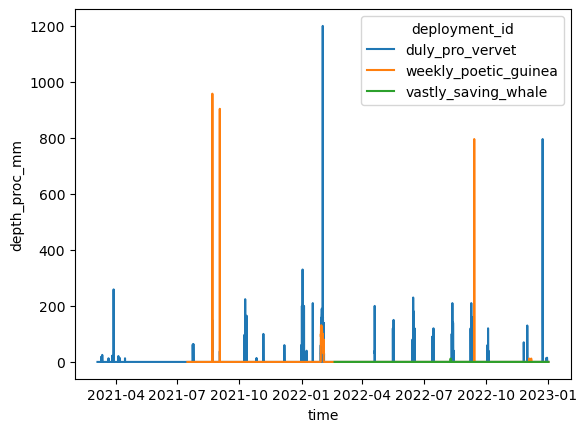

In [9]:
import seaborn as sns
#Small sample of the data just to see
sensors = ['vastly_saving_whale','weekly_poetic_guinea','duly_pro_vervet']

sns.lineplot(
    data = df[ (df['deployment_id'].isin(sensors))  ].copy() ,
    x = 'time',
    y = 'depth_proc_mm',
    hue = 'deployment_id'
)

In [10]:
df = df.dropna( subset=['depth_filt_mm','depth_proc_mm'] , axis = 0 )

In [11]:
# depth_proc_mm is the field that has reduced noise -- to remove things like cars or bikes that might be throwing sensor readings off
# convert that column to inches
df['depth_inches']=(df.depth_proc_mm/25.4).round(1)
df[df['depth_inches']>1]


time      deployment_id  depth_filt_mm  \
179     2021-02-01 05:42:09.490403+00:00   daily_new_falcon           44.0   
225     2021-02-01 07:16:35.047976+00:00   daily_new_falcon           59.0   
229     2021-02-01 07:20:52.435974+00:00   daily_new_falcon           64.0   
233     2021-02-01 07:33:44.593375+00:00   daily_new_falcon           67.0   
240     2021-02-01 07:42:19.205273+00:00   daily_new_falcon           72.0   
...                                  ...                ...            ...   
8459577 2022-09-30 12:13:25.549000+00:00  easily_dear_mouse           80.0   
8459615 2022-09-30 12:15:31.192000+00:00  easily_dear_mouse           70.0   
8459631 2022-09-30 12:16:34.463000+00:00  easily_dear_mouse           90.0   
8459782 2022-09-30 12:26:01.678000+00:00  easily_dear_mouse           40.0   
8459833 2022-09-30 12:29:10.991000+00:00  easily_dear_mouse           90.0   

         depth_proc_mm  depth_inches  
179               44.0           1.7  
225               59.0           2.3  
229               64.0           2.5  
233               67.0           2.6  
240               72.0           2.8  
...                ...           ...  
8459577           80.0           3.1  
8459615           70.0           2.8  
8459631           90.0           3.5  
8459782           40.0           1.6  
8459833           90.0           3.5  

[145427 rows x 5 columns]

In [13]:
# where was the deepest detection and when? 
# this incident is not visible on floodnet. How was it removed from their data? 
#df[df['depth_inches']==df['depth_inches'].max()]
df.nlargest(10,'depth_inches')

time        deployment_id  depth_filt_mm  \
7249570 2022-04-01 13:38:30.120995+00:00  evenly_divine_dingo         1590.0   
3755736 2022-12-22 13:18:02.514000+00:00     early_still_frog         1579.0   
3713863 2022-12-20 22:33:50.496000+00:00        duly_star_bee         1571.0   
5002525 2022-01-12 08:02:50.711834+00:00      simply_pet_joey         1560.0   
5003525 2022-01-12 09:37:15.312615+00:00      simply_pet_joey         1560.0   
5003548 2022-01-12 09:39:21.494435+00:00      simply_pet_joey         1560.0   
5002282 2022-01-12 07:39:45.212225+00:00      simply_pet_joey         1550.0   
5002511 2022-01-12 08:01:47.398111+00:00      simply_pet_joey         1550.0   
5004859 2022-01-12 11:41:16.983353+00:00      simply_pet_joey         1520.0   
3591859 2022-12-15 22:35:12.212000+00:00  overly_heroic_squid         1508.0   

         depth_proc_mm  depth_inches  
7249570         1590.0          62.6  
3755736         1579.0          62.2  
3713863         1571.0          61.9  
5002525         1560.0          61.4  
5003525         1560.0          61.4  
5003548         1560.0          61.4  
5002282         1550.0          61.0  
5002511         1550.0          61.0  
5004859         1520.0          59.8  
3591859         1508.0          59.4

### Weekly aggregation of flood values.  
Sensor name vs Time

Text(0.0, 1.0, 'SENSOR ACTIVITY SINCE DECEMBER 2020\n')

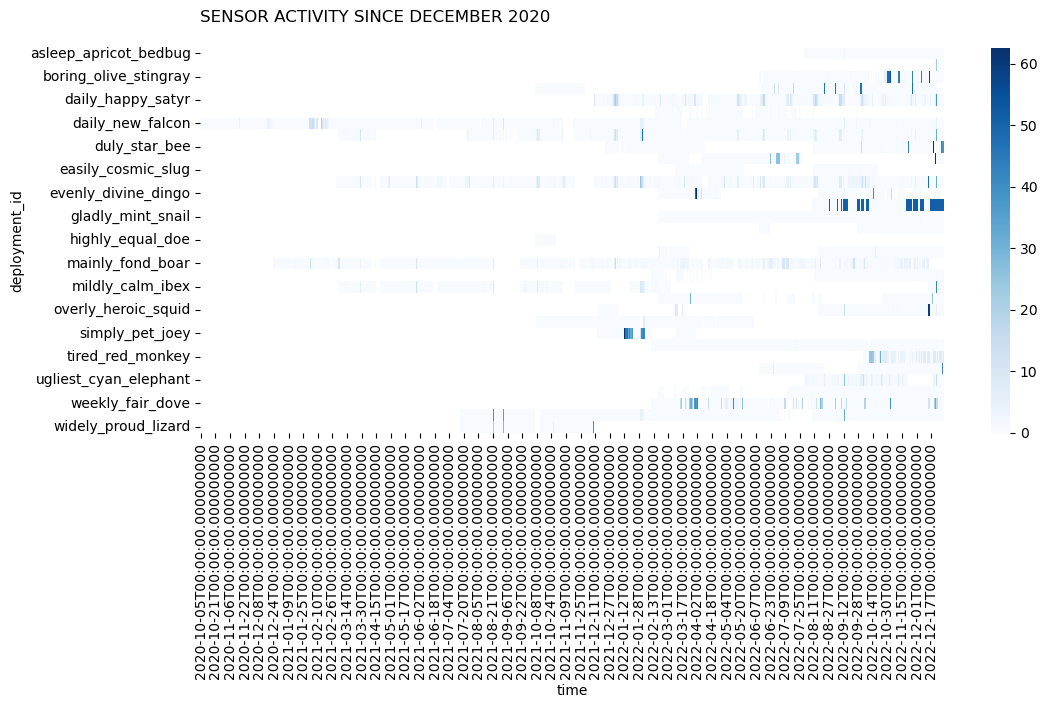

In [14]:
pt = pd.pivot_table(
    data = df[ df[['depth_inches']].sum(axis=1) >= 0 ],
    index = 'deployment_id',
    columns=pd.Grouper(key='time', freq='d'),
    #aggfunc=len, # 
    aggfunc=max, # show when the deepest measures were 
    values  = 'depth_inches'
)
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(
    data = pt,
    cmap="Blues"
)
# title
title = 'Sensor activity since December 2020\n'.upper()
plt.title(title, loc='left')
#ax = sns.heatmap
#ticklabels = [data.index[int(tick)].strftime('%Y-%m-%d') for tick in ax.get_yticks()]

#ax.xaxis.set_ticklabels([d.strftime('%d-%b') for d in covid_matrix.columns[ax.get_xticks().astype(int)]])


In [15]:
df.head(2)

time     deployment_id  depth_filt_mm  \
0 2021-02-01 00:02:26.223569+00:00  daily_new_falcon            0.0   
1 2021-02-01 00:06:44.274805+00:00  daily_new_falcon            0.0   

   depth_proc_mm  depth_inches  
0            0.0           0.0  
1            0.0           0.0

### Find highest water depth per day per sensor  
Each sensor has the columns for all days in the data set. Some days will be all 0's.   
If there is no rain, the max recorded will be 0.   
Remove the fill_value to get NULL's for this.

Text(0.5, 1.0, 'depth in inches distribution')

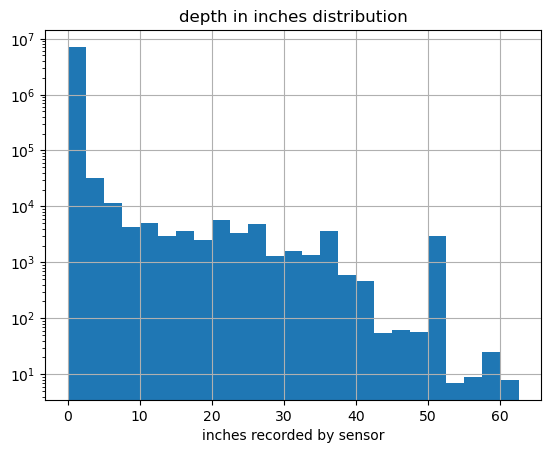

In [21]:
import matplotlib.pyplot as plt
df['depth_inches'].hist(bins=25)
plt.yscale('log')
plt.xlabel("inches recorded by sensor")
plt.title( 'depth in inches distribution' )


In [22]:
pt_max = pd.pivot_table(
    data = df, 
    index = 'deployment_id',
    columns=pd.Grouper(key='time', freq='1D'), # Group time column by day
    aggfunc="max", # When you group, use MAX as the aggreagation function
    values  = 'depth_inches', # Which columns the values should be coming from,
    fill_value=0 # When the sensor is not reporting, I can assume it is 0
)

pt_max.columns = [i.strftime("%d-%m-%y") for i in pt_max.columns]

pt_max.head(10)


05-10-20  06-10-20  07-10-20  08-10-20  09-10-20  \
deployment_id                                                             
asleep_apricot_bedbug         0         0         0         0         0   
bored_blue_fish               0         0         0         0         0   
boring_olive_stingray         0         0         0         0         0   
daily_gentle_beetle           0         0         0         0         0   
daily_happy_satyr             0         0         0         0         0   
daily_mutual_gnat             0         0         0         0         0   
daily_new_falcon              0         0         0         0         0   
duly_pro_vervet               0         0         0         0         0   
duly_star_bee                 0         0         0         0         0   
early_still_frog              0         0         0         0         0   

                       10-10-20  11-10-20  12-10-20  13-10-20  14-10-20  \
deployment_id                                                             
asleep_apricot_bedbug         0         0         0         0         0   
bored_blue_fish               0         0         0         0         0   
boring_olive_stingray         0         0         0         0         0   
daily_gentle_beetle           0         0         0         0         0   
daily_happy_satyr             0         0         0         0         0   
daily_mutual_gnat             0         0         0         0         0   
daily_new_falcon              0         0         0         0         0   
duly_pro_vervet               0         0         0         0         0   
duly_star_bee                 0         0         0         0         0   
early_still_frog              0         0         0         0         0   

                       15-10-20  16-10-20  17-10-20  18-10-20  19-10-20  \
deployment_id                                                             
asleep_apricot_bedbug         0         0         0         0         0   
bored_blue_fish               0         0         0         0         0   
boring_olive_stingray         0         0         0         0         0   
daily_gentle_beetle           0         0         0         0         0   
daily_happy_satyr             0         0         0         0         0   
daily_mutual_gnat             0         0         0         0         0   
daily_new_falcon              0         0         0         0         0   
duly_pro_vervet               0         0         0         0         0   
duly_star_bee                 0         0         0         0         0   
early_still_frog              0         0         0         0         0   

                       20-10-20  21-10-20  22-10-20  23-10-20  24-10-20  \
deployment_id                                                             
asleep_apricot_bedbug         0         0         0         0         0   
bored_blue_fish               0         0         0         0         0   
boring_olive_stingray         0         0         0         0         0   
daily_gentle_beetle           0         0         0         0         0   
daily_happy_satyr             0         0         0         0         0   
daily_mutual_gnat             0         0         0         0         0   
daily_new_falcon              0         0         0         0         0   
duly_pro_vervet               0         0         0         0         0   
duly_star_bee                 0         0         0         0         0   
early_still_frog              0         0         0         0         0   

                       25-10-20  26-10-20  27-10-20  28-10-20  29-10-20  \
deployment_id                                                             
asleep_apricot_bedbug         0         0         0         0         0   
bored_blue_fish               0         0         0         0         0   
boring_olive_stingray         0         0         0         0         0   
daily_gentle_beetle           0         0   

## Spatial Data

In [23]:
import openpyxl

In [24]:
sensor_locations = pd.read_excel("/Users/saraeichner/Dropbox/FloodWatch_Repo/data/Sensor Locations Directory.xlsx" , sheet_name= 'street sensors (live)')

sensor_locations = sensor_locations[['sensor_display_name','deployment_id','lat','lon']].copy()
sensor_locations = sensor_locations.iloc[1:]
sensor_locations

sensor_display_name           deployment_id        lat  \
1          BK - 4th Av/Garfield Pl     daily_gentle_beetle  40.675855   
2   BK - 9th St/Smith St (RETIRED)     widely_proud_lizard  40.673654   
3             BK - 9th St/Smith St     overly_heroic_squid  40.673401   
4           BK - Carroll St/4th Av    weekly_poetic_guinea  40.676281   
5          BK - Columbia St/Bay St     vastly_saving_whale  40.673267   
6           BK - Dwight St/King St    openly_driven_tarpon  40.676293   
7           BK - Gerry St/Union Av          (not live yet)  40.699881   
8            BK - Henry St/Mill St      jolly_tender_squid  40.675734   
9              BK - Hoyt St/5th St        daily_new_falcon  40.676672   
10       BK - Lorraine St/Henry St        early_still_frog  40.673707   
11         BK - Marcy Av/Ellery St       really_vocal_puma  40.697974   
12      BK - Pioneer St/Conover St       gladly_mint_snail  40.679734   
13       BK - Van Brunt St/Reed St     evenly_divine_dingo  40.674602   
14  BX - Colgate Av/Westchester Av        weekly_fair_dove  40.828427   
15       BX - Home St/Intervale Av       daily_mutual_gnat  40.828263   
16  BX - Louis Niñé Bl/Southern Bl       mainly_whole_slug  40.830972   
17       BX - Sheridan Bl/173rd St      slowly_fast_sawfly  40.833601   
18             M - 126th St/7th Av      easily_cosmic_slug   40.80983   
19     M - Morningside Av/125th St           duly_star_bee  40.811159   
20           M - Waverly Pl/6th Av         simply_pet_joey  40.732986   
21              Q - Davenport Ct 1        mildly_calm_ibex  40.653387   
22    Q - Davenport Ct 2 (RETIRED)        mainly_fond_boar  40.653387   
23                Q - Russell St 1         duly_pro_vervet  40.654312   
24                Q - Russell St 2       easily_dear_mouse  40.654254   
25          Q - 157th St/109th Ave  total_moccasin_dolphin  40.693297   
26          Q - 108th Ave/159th St   handsome_violet_leech  40.695371   
27          Q - 159th St/109th Ave   boring_olive_stingray   40.69395   
28    Q - Brinkerhoff Ave/157th St        tired_red_monkey  40.691989   
29              Q - Beach 43rd St          bored_blue_fish  40.600158   
30                 Q - Beach 84 St       daily_happy_satyr   40.59136   
31                    SI - Loop Rd   ugliest_cyan_elephant   40.60694   
32       SI - Willow Rd E/Nina Ave   asleep_apricot_bedbug   40.61133   
33          SI - Lyon Pl/Devens St     future_aqua_wildcat  40.619373   
34              SI - Maple Parkway     disabled_pink_prawn  40.628844   
35   SI - Jewett Ave/Castleton Ave    useless_crimson_rook  40.633346   

          lon  
1  -73.983944  
2  -73.995396  
3  -73.994892  
4  -73.984089  
5  -74.008418  
6  -74.008641  
7  -73.949919  
8  -74.003396  
9  -73.994591  
10  -74.00435  
11 -73.949837  
12 -74.012422  
13  -74.01607  
14 -73.882035  
15 -73.895037  
16  -73.89224  
17 -73.883273  
18   -73.9481  
19 -73.954033  
20 -74.000336  
21 -73.830559  
22 -73.830559  
23 -73.831566  
24 -73.831736  
25 -73.794337  
26 -73.794115  
27 -73.793087  
28 -73.792461  
29 -73.775325  
30  -73.80996  
31 -74.153458  
32 -74.151058  
33 -74.147436  
34 -74.156759  
35 -74.129583

### Create Geospatial Data from Sensor locations  
You can join the above heatmap or similar data using deployment name.  
**I'd suggest using aggregated data. In Raw format this data is enourmous.**

(-8257215.733896722, -8210508.616257443, 4950474.134591788, 4989607.572848657)

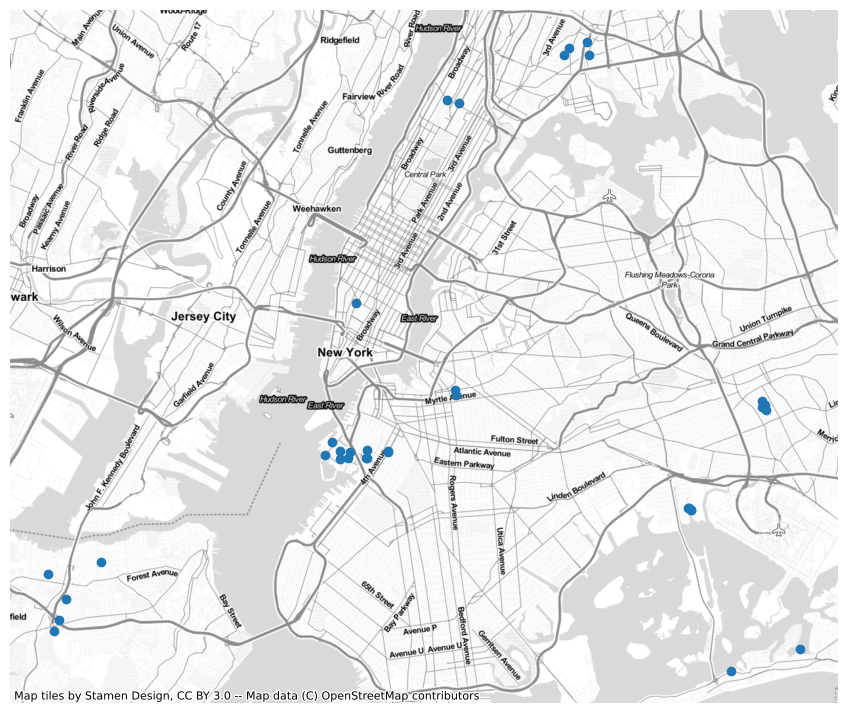

In [25]:
import geopandas as gpd
import contextily as cx
# make a geodataframe of sensor points

sensor_locations_geo = gpd.GeoDataFrame(
    data = sensor_locations,
    geometry=gpd.points_from_xy( sensor_locations['lon'],sensor_locations['lat'] ),
    crs = 4326
)

ax = sensor_locations_geo.to_crs(3857).plot(figsize=(11, 9))
cx.add_basemap( ax, source=cx.providers.Stamen.TonerLite )
ax.axis('off')

### Join Data to Sensor Locations  
Aggregate and join to sensor location / spatial data
* Create count of all detections of  4” or more (to visualize the locations with highest flood frequency)
* Create max flood depth for each site to show where most severe flooding happens (intensity)  

I am using daily data. I'll remove the days where sum is 0 so nothing is recorded.

In [26]:
# 1. Remove columns where no flood was recorded. 
pt_max = pt_max[ pt_max.columns[ pt_max.sum() > 0 ] ]
pt_max.head()

10-11-20  16-11-20  30-11-20  12-12-20  17-12-20  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0       0.0       0.0       0.0   
daily_gentle_beetle         0.0       0.0       0.0       0.0       0.0   
daily_happy_satyr           0.0       0.0       0.0       0.0       0.0   

                       18-12-20  19-12-20  20-12-20  21-12-20  22-12-20  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0         0       0.0   
bored_blue_fish             0.0       0.0       0.0         0       0.0   
boring_olive_stingray       0.0       0.0       0.0         0       0.0   
daily_gentle_beetle         0.0       0.0       0.0         0       0.0   
daily_happy_satyr           0.0       0.0       0.0         0       0.0   

                       25-12-20  28-12-20  30-12-20  02-01-21  04-01-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0       0.0       0.0       0.0   
daily_gentle_beetle         0.0       0.0       0.0       0.0       0.0   
daily_happy_satyr           0.0       0.0       0.0       0.0       0.0   

                       05-01-21  07-01-21  08-01-21  09-01-21  16-01-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0       0.0       0.0       0.0   
daily_gentle_beetle         0.0       0.0       0.0       0.0       0.0   
daily_happy_satyr           0.0       0.0       0.0       0.0       0.0   

                       17-01-21  18-01-21  30-01-21  01-02-21  02-02-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0       0.0       0.0       0.0   
daily_gentle_beetle         0.0       0.0       0.0       0.0       0.0   
daily_happy_satyr           0.0       0.0       0.0       0.0       0.0   

                       03-02-21  04-02-21  05-02-21  06-02-21  07-02-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0         0       0.0   
bored_blue_fish             0.0       0.0       0.0         0       0.0   
boring_olive_stingray       0.0       0.0       0.0         0       0.0   
daily_gentle_beetle         0.0       0.0       0.0         0       0.0   
daily_happy_satyr           0.0       0.0       0.0         0       0.0   

                       09-02-21  10-02-21  14-02-21  15-02-21  16-02-21  \
deployment_id                                                             
asleep_apricot_bedbug         0       0.0       0.0       0.0         0   
bored_blue_fish               0       0.0       0.0       0.0         0   
boring_olive_stingray         0       0.0       0.0       0.0         0   
daily_gentle_beetle           0       0.0       0.0       0.0         0   
daily_happy_satyr             0       0.0       0.0       0.0         0   

                       17-02-21  18-02-21  19-02-21  20-02-21  21-02-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0

In [27]:
# how mamy sensors detected water? 
len(pt_max)

33

#### Find dates with more than 4" of rain and count how many  
Create count of all detections of  4” or more (to visualize the locations with highest flood frequency)  
4" = 101mm

In [28]:
# pt = pivot table, pt_max tracks deepest measure per day, this is aggregating those days to a count of wet days for each sensor
# size = count of wet days

pt_max_list = pt_max.stack().reset_index()
# what is the stack function for? is it a way to sort?
pt_max_list.columns = ['deployment_id','date','depth']

pt_max_list = pt_max_list[ pt_max_list['depth'] >= 4] 

wet_days = pt_max_list.groupby('deployment_id', as_index=False).size()
wet_days.head()

deployment_id  size
0        bored_blue_fish     1
1  boring_olive_stingray    14
2    daily_gentle_beetle    11
3      daily_happy_satyr    55
4       daily_new_falcon    28

#### Join wet days with sensor locations info

In [29]:
len(wet_days)

24

(-8256829.884400549, -8210526.990042975, 4950512.200096584, 4988808.197247956)

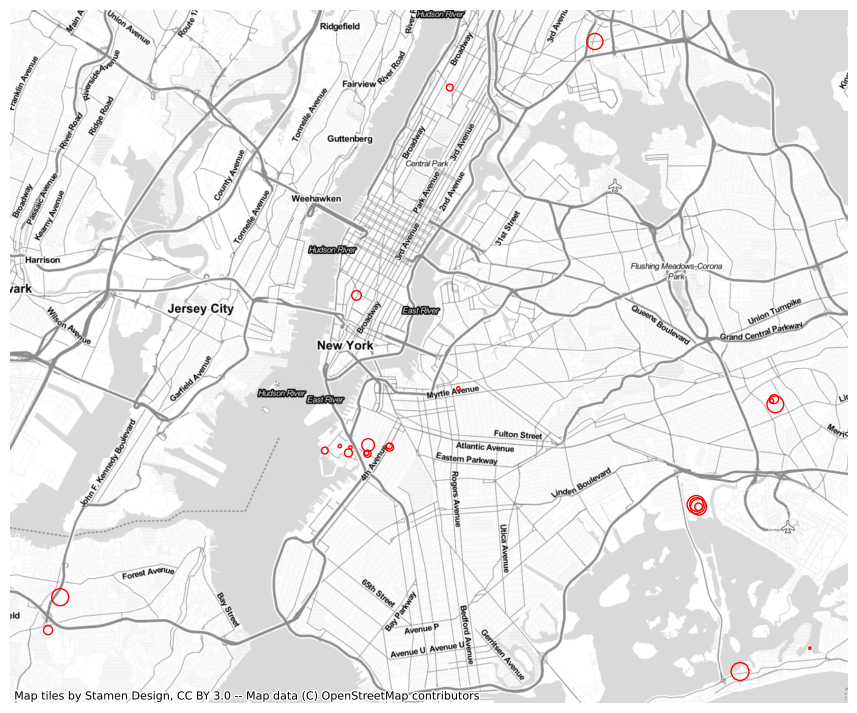

In [31]:
# sensor_meansures is the joined df
# join the wet day counts to the sensor points so it can be mapped
sensor_measures = sensor_locations_geo.join( wet_days.set_index("deployment_id") , on='deployment_id' )

# style the sensor locations by # of wet days
ax2 = sensor_measures.to_crs(3857).plot( markersize = sensor_measures['size']*3 , edgecolor = 'red' , facecolor ='none' , lw = 1 ,figsize=(19, 9))
cx.add_basemap( ax2, source=cx.providers.Stamen.TonerLite  )
ax2.axis('off')

In [32]:
# which sensor had the highest number of wet days? and which one was it? 
print(sensor_measures['size'].max())
#print(sensor_measures['size'].max())
sensor_measures.nlargest(10,'size')

56.0


sensor_display_name          deployment_id        lat  \
24                Q - Russell St 2      easily_dear_mouse  40.654254   
30                 Q - Beach 84 St      daily_happy_satyr   40.59136   
33          SI - Lyon Pl/Devens St    future_aqua_wildcat  40.619373   
28    Q - Brinkerhoff Ave/157th St       tired_red_monkey  40.691989   
14  BX - Colgate Av/Westchester Av       weekly_fair_dove  40.828427   
22    Q - Davenport Ct 2 (RETIRED)       mainly_fond_boar  40.653387   
23                Q - Russell St 1        duly_pro_vervet  40.654312   
9              BK - Hoyt St/5th St       daily_new_falcon  40.676672   
20           M - Waverly Pl/6th Av        simply_pet_joey  40.732986   
27          Q - 159th St/109th Ave  boring_olive_stingray   40.69395   

          lon                    geometry  size  
24 -73.831736  POINT (-73.83174 40.65425)  56.0  
30  -73.80996  POINT (-73.80996 40.59136)  55.0  
33 -74.147436  POINT (-74.14744 40.61937)  50.0  
28 -73.792461  POINT (-73.79246 40.69199)  48.0  
14 -73.882035  POINT (-73.88204 40.82843)  45.0  
22 -73.830559  POINT (-73.83056 40.65339)  45.0  
23 -73.831566  POINT (-73.83157 40.65431)  32.0  
9  -73.994591  POINT (-73.99459 40.67667)  28.0  
20 -74.000336  POINT (-74.00034 40.73299)  16.0  
27 -73.793087  POINT (-73.79309 40.69395)  14.0

In [176]:
sensor_measures.to_file('/Users/saraeichner/Dropbox/FloodWatch_Repo/data/floodnet_spatial_data/sensor_wet_day_counts2.geojson', driver="GeoJSON",encoding = 'utf-8')

### Create max flood depth for each site to show where most severe flooding happens (intensity) 

In [33]:
pt_max.head()
# pt_max is the pivot table with all the dates with depth for each sensor

10-11-20  16-11-20  30-11-20  12-12-20  17-12-20  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0       0.0       0.0       0.0   
daily_gentle_beetle         0.0       0.0       0.0       0.0       0.0   
daily_happy_satyr           0.0       0.0       0.0       0.0       0.0   

                       18-12-20  19-12-20  20-12-20  21-12-20  22-12-20  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0         0       0.0   
bored_blue_fish             0.0       0.0       0.0         0       0.0   
boring_olive_stingray       0.0       0.0       0.0         0       0.0   
daily_gentle_beetle         0.0       0.0       0.0         0       0.0   
daily_happy_satyr           0.0       0.0       0.0         0       0.0   

                       25-12-20  28-12-20  30-12-20  02-01-21  04-01-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0       0.0       0.0       0.0   
daily_gentle_beetle         0.0       0.0       0.0       0.0       0.0   
daily_happy_satyr           0.0       0.0       0.0       0.0       0.0   

                       05-01-21  07-01-21  08-01-21  09-01-21  16-01-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0       0.0       0.0       0.0   
daily_gentle_beetle         0.0       0.0       0.0       0.0       0.0   
daily_happy_satyr           0.0       0.0       0.0       0.0       0.0   

                       17-01-21  18-01-21  30-01-21  01-02-21  02-02-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0       0.0       0.0       0.0   
daily_gentle_beetle         0.0       0.0       0.0       0.0       0.0   
daily_happy_satyr           0.0       0.0       0.0       0.0       0.0   

                       03-02-21  04-02-21  05-02-21  06-02-21  07-02-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0         0       0.0   
bored_blue_fish             0.0       0.0       0.0         0       0.0   
boring_olive_stingray       0.0       0.0       0.0         0       0.0   
daily_gentle_beetle         0.0       0.0       0.0         0       0.0   
daily_happy_satyr           0.0       0.0       0.0         0       0.0   

                       09-02-21  10-02-21  14-02-21  15-02-21  16-02-21  \
deployment_id                                                             
asleep_apricot_bedbug         0       0.0       0.0       0.0         0   
bored_blue_fish               0       0.0       0.0       0.0         0   
boring_olive_stingray         0       0.0       0.0       0.0         0   
daily_gentle_beetle           0       0.0       0.0       0.0         0   
daily_happy_satyr             0       0.0       0.0       0.0         0   

                       17-02-21  18-02-21  19-02-21  20-02-21  21-02-21  \
deployment_id                                                             
asleep_apricot_bedbug       0.0       0.0       0.0       0.0       0.0   
bored_blue_fish             0.0       0.0       0.0       0.0       0.0   
boring_olive_stingray       0.0       0.0

In [34]:
print(len(pt_max_list)) # pt_max_list is all dates with water above 4" detected and depths in inches
# look at largest ones
pt_max_list.nlargest(5,'depth')

480


deployment_id      date  depth
6030   evenly_divine_dingo  01-04-22   62.6
4820      early_still_frog  22-12-22   62.2
4335         duly_star_bee  20-12-22   61.9
11764      simply_pet_joey  12-01-22   61.4
11092  overly_heroic_squid  15-12-22   59.4

### find deepest flood recorded 



* * * 

* * * 
* * * 
* * * 

* * * 
* * * 

In [38]:
# This finds the max depth detected for each day by each sensor, for a heatmap
max_depth_per_day =pt_max_list.groupby(['deployment_id', 'date']).max()
max_depth_per_day.head()

depth
deployment_id         date           
bored_blue_fish       23-12-22   23.6
boring_olive_stingray 01-11-22   48.5
                      02-11-22   53.0
                      03-11-22    5.0
                      04-11-22    4.4

In [42]:
len(max_depth_per_day)

480

In [44]:
max_depth = pt_max_list.groupby('deployment_id').max() # Ask max of the id
max_depth = max_depth[max_depth['depth']  > 0 ].copy() # I don't want the sensor if no rain is recorded
print(max_depth[['depth']].min())
print(max_depth[['depth']].max())
print(len(max_depth))

depth    4.3
dtype: float64
depth    62.6
dtype: float64
24


In [50]:
#max_depth.head()
len(max_depth)

15939

In [46]:
# remove index 
max_depth = pt_max.stack().reset_index()
max_depth.columns = ['deployment_id','date','depth']

In [51]:
# group max_depths by deployment id and take only the largest number and preserve the unique dates for each maximum depth recorded for each sensor
# .idxmax finds the unique value

md = max_depth.loc[max_depth.groupby(['deployment_id'])['depth'].idxmax()]#
md.head()

deployment_id      date  depth
373   asleep_apricot_bedbug  13-09-22    1.8
957         bored_blue_fish  23-12-22   23.6
1432  boring_olive_stingray  15-12-22   57.2
1812    daily_gentle_beetle  03-09-22   46.9
2406      daily_happy_satyr  23-12-22   38.2

In [52]:
len(md)

33

In [47]:
print(max_depth.info())
print(sensor_locations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15939 entries, 0 to 15938
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   deployment_id  15939 non-null  object 
 1   date           15939 non-null  object 
 2   depth          15939 non-null  float64
dtypes: float64(1), object(2)
memory usage: 373.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 1 to 35
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   sensor_display_name  35 non-null     object  
 1   deployment_id        35 non-null     object  
 2   lat                  35 non-null     object  
 3   lon                  35 non-null     object  
 4   geometry             35 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 1.5+ KB
None


## join max depth data to sensor locations to map by deepest detections

In [153]:
# this dataframe has all the same dates / don't use it# 
# deepest_measures2.head()

(-8256829.884400549, -8210526.990042975, 4950474.134591788, 4989607.572848657)

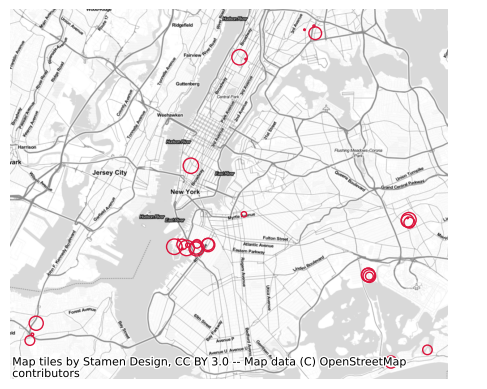

In [54]:
# sensor_meansures is the joined DB  
md_sensors = sensor_locations.join(md.set_index("deployment_id") , on='deployment_id' )

md_sensors_spatial = gpd.GeoDataFrame(
    data = md_sensors,
    geometry=gpd.points_from_xy( sensor_locations['lon'],sensor_locations['lat'] ),
    crs = 4326
)

ax = md_sensors_spatial.to_crs(3857).plot( markersize = md_sensors_spatial['depth']*2 , edgecolor = 'crimson' , facecolor ='none' , lw = 1 )
figsize=(15, 9)
cx.add_basemap( ax, source=cx.providers.Stamen.TonerLite  )
ax.axis('off')

In [55]:
md_sensors_spatial.tail()

sensor_display_name          deployment_id        lat  \
31                   SI - Loop Rd  ugliest_cyan_elephant   40.60694   
32      SI - Willow Rd E/Nina Ave  asleep_apricot_bedbug   40.61133   
33         SI - Lyon Pl/Devens St    future_aqua_wildcat  40.619373   
34             SI - Maple Parkway    disabled_pink_prawn  40.628844   
35  SI - Jewett Ave/Castleton Ave   useless_crimson_rook  40.633346   

          lon                    geometry      date  depth  
31 -74.153458  POINT (-74.15346 40.60694)  13-09-22   24.7  
32 -74.151058  POINT (-74.15106 40.61133)  13-09-22    1.8  
33 -74.147436  POINT (-74.14744 40.61937)  23-11-22   51.6  
34 -74.156759  POINT (-74.15676 40.62884)       NaN    NaN  
35 -74.129583  POINT (-74.12958 40.63335)       NaN    NaN

In [56]:
wet_days.head()

deployment_id  size
0        bored_blue_fish     1
1  boring_olive_stingray    14
2    daily_gentle_beetle    11
3      daily_happy_satyr    55
4       daily_new_falcon    28

In [57]:
# also join wet days to sensor locations
sensor_stats_redo = md_sensors_spatial.join(wet_days.set_index("deployment_id") , on='deployment_id' )
sensor_stats_redo.head()

sensor_display_name         deployment_id        lat        lon  \
1         BK - 4th Av/Garfield Pl   daily_gentle_beetle  40.675855 -73.983944   
2  BK - 9th St/Smith St (RETIRED)   widely_proud_lizard  40.673654 -73.995396   
3            BK - 9th St/Smith St   overly_heroic_squid  40.673401 -73.994892   
4          BK - Carroll St/4th Av  weekly_poetic_guinea  40.676281 -73.984089   
5         BK - Columbia St/Bay St   vastly_saving_whale  40.673267 -74.008418   

                     geometry      date  depth  size  
1  POINT (-73.98394 40.67585)  03-09-22   46.9  11.0  
2  POINT (-73.99540 40.67365)  09-12-21   38.5   4.0  
3  POINT (-73.99489 40.67340)  15-12-22   59.4   9.0  
4  POINT (-73.98409 40.67628)  22-08-21   37.7   6.0  
5  POINT (-74.00842 40.67327)  09-08-22    0.5   NaN

In [58]:
## change columnn names
sensor_stats_redo.rename(columns = {'date':'date_max_depth','depth':'max_depth', 'size':'wet_day_count'}, inplace = True)
sensor_stats_redo.head()

sensor_display_name         deployment_id        lat        lon  \
1         BK - 4th Av/Garfield Pl   daily_gentle_beetle  40.675855 -73.983944   
2  BK - 9th St/Smith St (RETIRED)   widely_proud_lizard  40.673654 -73.995396   
3            BK - 9th St/Smith St   overly_heroic_squid  40.673401 -73.994892   
4          BK - Carroll St/4th Av  weekly_poetic_guinea  40.676281 -73.984089   
5         BK - Columbia St/Bay St   vastly_saving_whale  40.673267 -74.008418   

                     geometry date_max_depth  max_depth  wet_day_count  
1  POINT (-73.98394 40.67585)       03-09-22       46.9           11.0  
2  POINT (-73.99540 40.67365)       09-12-21       38.5            4.0  
3  POINT (-73.99489 40.67340)       15-12-22       59.4            9.0  
4  POINT (-73.98409 40.67628)       22-08-21       37.7            6.0  
5  POINT (-74.00842 40.67327)       09-08-22        0.5            NaN

In [59]:
# save spatial data with sensor statistics 
sensor_stats_redo.to_file('/Users/saraeichner/Dropbox/FloodWatch_Repo/data/floodnet_spatial_data/sensors_and_max_depth_020623.geojson', driver="GeoJSON",encoding = 'utf-8')

## join NTA names to sensors so that we can subset by neighborhood for visualizations

In [60]:
ntas = gpd.read_file('/Users/saraeichner/Dropbox/FloodWatch_Repo/data/NTAs/NTA_flood_incidents_join_2263.geojson', driver='GeoJSON')
ntas = ntas.to_crs(3857) # Project to 3857

In [61]:
ntas.head()
print((ntas).columns.to_list())

['BoroCode', 'BoroName', 'CountyFIPS', 'NTA2020', 'NTAName', 'NTAAbbrev', 'NTAType', 'CDTA2020', 'CDTAName', 'Shape_Leng', 'Shape_Area', 'depth_in_count', 'depth_in_max', 'depth_in_sum', 'depth_in_mean', 'size_count', 'size_max', 'size_sum', 'size_mean', 'neighborho_count', 'total_flood_count', 'labels', 'geometry']


In [62]:
cols = ['BoroCode','BoroName','CountyFIPS','NTA2020','NTAName','NTAAbbrev','labels','geometry']
nta_j = ntas[ cols ]
nta_j.head()

BoroCode  BoroName CountyFIPS NTA2020             NTAName  NTAAbbrev  \
0         3  Brooklyn        047  BK0101          Greenpoint      Grnpt   
1         3  Brooklyn        047  BK0102        Williamsburg   Wllmsbrg   
2         3  Brooklyn        047  BK0103  South Williamsburg  SWllmsbrg   
3         3  Brooklyn        047  BK0104   East Williamsburg  EWllmsbrg   
4         3  Brooklyn        047  BK0201    Brooklyn Heights      BkHts   

           labels                                           geometry  
0      Greenpoint  MULTIPOLYGON (((-8230087.498 4972327.489, -823...  
1    Williamsburg  MULTIPOLYGON (((-8232982.796 4971775.871, -823...  
2  S Williamsburg  MULTIPOLYGON (((-8232102.711 4968995.540, -823...  
3  E Williamsburg  MULTIPOLYGON (((-8229188.611 4970264.113, -822...  
4    Brooklyn Hts  MULTIPOLYGON (((-8236792.233 4966678.147, -823...

In [63]:
sensor_stats_redo= sensor_stats_redo.to_crs(3857)

In [64]:
 # join nta_j ids, names, etc to sensor_stats
sensor_stats_nta_index = gpd.sjoin(sensor_stats_redo,nta_j)
#sensor_stats_nta_index

sensor_stats_nta_index.head(3)

sensor_display_name        deployment_id        lat        lon  \
1         BK - 4th Av/Garfield Pl  daily_gentle_beetle  40.675855 -73.983944   
2  BK - 9th St/Smith St (RETIRED)  widely_proud_lizard  40.673654 -73.995396   
3            BK - 9th St/Smith St  overly_heroic_squid  40.673401 -73.994892   

                           geometry date_max_depth  max_depth  wet_day_count  \
1  POINT (-8235854.941 4964647.246)       03-09-22       46.9           11.0   
2  POINT (-8237129.850 4964324.272)       09-12-21       38.5            4.0   
3  POINT (-8237073.699 4964287.086)       15-12-22       59.4            9.0   

   index_right  BoroCode  BoroName CountyFIPS NTA2020  \
1           21         3  Brooklyn        047  BK0602   
2           20         3  Brooklyn        047  BK0601   
3           20         3  Brooklyn        047  BK0601   

                                        NTAName   NTAAbbrev  \
1                                    Park Slope       PkSlp   
2  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   
3  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   

                           labels  
1                      Park Slope  
2  Carroll Gardens-Cobble Hill-Go  
3  Carroll Gardens-Cobble Hill-Go

In [65]:
len(sensor_stats_nta_index)

35

In [66]:
sensor_stats_nta_index.to_file('/Users/saraeichner/Dropbox/FloodWatch_Repo/data/floodnet_spatial_data/sensor_statistics_redo_020623.geojson', driver="GeoJSON",encoding = 'utf-8')
sensor_stats_nta_index.to_csv('/Users/saraeichner/Dropbox/FloodWatch_Repo/data/floodnet_spatial_data/sensor_statistics_redo_020623.csv',encoding = 'utf-8')

In [67]:
sensor_stats_nta_index.sort_values(by=['max_depth'], ascending=False)

sensor_display_name           deployment_id        lat  \
13       BK - Van Brunt St/Reed St     evenly_divine_dingo  40.674602   
10       BK - Lorraine St/Henry St        early_still_frog  40.673707   
19     M - Morningside Av/125th St           duly_star_bee  40.811159   
20           M - Waverly Pl/6th Av         simply_pet_joey  40.732986   
3             BK - 9th St/Smith St     overly_heroic_squid  40.673401   
27          Q - 159th St/109th Ave   boring_olive_stingray   40.69395   
33          SI - Lyon Pl/Devens St     future_aqua_wildcat  40.619373   
24                Q - Russell St 2       easily_dear_mouse  40.654254   
23                Q - Russell St 1         duly_pro_vervet  40.654312   
1          BK - 4th Av/Garfield Pl     daily_gentle_beetle  40.675855   
14  BX - Colgate Av/Westchester Av        weekly_fair_dove  40.828427   
21              Q - Davenport Ct 1        mildly_calm_ibex  40.653387   
25          Q - 157th St/109th Ave  total_moccasin_dolphin  40.693297   
2   BK - 9th St/Smith St (RETIRED)     widely_proud_lizard  40.673654   
30                 Q - Beach 84 St       daily_happy_satyr   40.59136   
4           BK - Carroll St/4th Av    weekly_poetic_guinea  40.676281   
28    Q - Brinkerhoff Ave/157th St        tired_red_monkey  40.691989   
6           BK - Dwight St/King St    openly_driven_tarpon  40.676293   
31                    SI - Loop Rd   ugliest_cyan_elephant   40.60694   
29              Q - Beach 43rd St          bored_blue_fish  40.600158   
9              BK - Hoyt St/5th St        daily_new_falcon  40.676672   
22    Q - Davenport Ct 2 (RETIRED)        mainly_fond_boar  40.653387   
11         BK - Marcy Av/Ellery St       really_vocal_puma  40.697974   
8            BK - Henry St/Mill St      jolly_tender_squid  40.675734   
32       SI - Willow Rd E/Nina Ave   asleep_apricot_bedbug   40.61133   
17       BX - Sheridan Bl/173rd St      slowly_fast_sawfly  40.833601   
18             M - 126th St/7th Av      easily_cosmic_slug   40.80983   
16  BX - Louis Niñé Bl/Southern Bl       mainly_whole_slug  40.830972   
26          Q - 108th Ave/159th St   handsome_violet_leech  40.695371   
5          BK - Columbia St/Bay St     vastly_saving_whale  40.673267   
12      BK - Pioneer St/Conover St       gladly_mint_snail  40.679734   
15       BX - Home St/Intervale Av       daily_mutual_gnat  40.828263   
7           BK - Gerry St/Union Av          (not live yet)  40.699881   
34              SI - Maple Parkway     disabled_pink_prawn  40.628844   
35   SI - Jewett Ave/Castleton Ave    useless_crimson_rook  40.633346   

          lon                          geometry date_max_depth  max_depth  \
13  -74.01607  POINT (-8239431.201 4964463.409)       01-04-22       62.6   
10  -74.00435  POINT (-8238126.503 4964331.941)       22-12-22       62.2   
19 -73.954033  POINT (-8232525.300 4984527.460)       20-12-22       61.9   
20 -74.000336  POINT (-8237679.700 4973036.593)       12-01-22       61.4   
3  -73.994892  POINT (-8237073.699 4964287.086)       15-12-22       59.4   
27 -73.793087  POINT (-8214608.872 4967303.660)       15-12-22       57.2   
33 -74.147436  POINT (-8254054.818 4956360.386)       23-11-22       51.6   
24 -73.831736  POINT (-8218911.233 4961477.220)       14-12-22       47.6   
23 -73.831566  POINT (-8218892.373 4961485.761)       01-02-22       47.2   
1  -73.983944  POINT (-8235854.941 4964647.246)       03-09-22       46.9   
14 -73.882035  POINT (-8224510.559 4987067.470)       11-05-22       41.7   
21 -73.830559  POINT (-8218780.188 4961349.945)       23-12-22       41.1   
25 -73.794337  POINT (-8214747.998 4967207.706)       29-12-22       41.1   
2  -73.995396  POINT (-8237129.850 4964324.272)       09-12-21       38.5   
30  -73.80996  POINT (-8216487.163 4952252.927)       23-12-22       38.2   
4  -73.984089  POINT (-8235871.064 4964709.747)       22-08-21       37.7   
28 -73.792461  POINT (-8214539.183 4967015.718)       22-10-22       31.4   


In [69]:
rh =sensor_stats_nta_index[sensor_stats_nta_index['NTA2020']=='BK0601'] 
rh.head(9)

sensor_display_name         deployment_id        lat  \
2   BK - 9th St/Smith St (RETIRED)   widely_proud_lizard  40.673654   
3             BK - 9th St/Smith St   overly_heroic_squid  40.673401   
4           BK - Carroll St/4th Av  weekly_poetic_guinea  40.676281   
5          BK - Columbia St/Bay St   vastly_saving_whale  40.673267   
6           BK - Dwight St/King St  openly_driven_tarpon  40.676293   
8            BK - Henry St/Mill St    jolly_tender_squid  40.675734   
9              BK - Hoyt St/5th St      daily_new_falcon  40.676672   
10       BK - Lorraine St/Henry St      early_still_frog  40.673707   
12      BK - Pioneer St/Conover St     gladly_mint_snail  40.679734   

          lon                          geometry date_max_depth  max_depth  \
2  -73.995396  POINT (-8237129.850 4964324.272)       09-12-21       38.5   
3  -73.994892  POINT (-8237073.699 4964287.086)       15-12-22       59.4   
4  -73.984089  POINT (-8235871.064 4964709.747)       22-08-21       37.7   
5  -74.008418  POINT (-8238579.417 4964267.448)       09-08-22        0.5   
6  -74.008641  POINT (-8238604.197 4964711.583)       25-03-22       29.1   
8  -74.003396  POINT (-8238020.388 4964629.553)       19-02-22        4.3   
9  -73.994591  POINT (-8237040.186 4964767.202)       14-02-21       19.1   
10  -74.00435  POINT (-8238126.503 4964331.941)       22-12-22       62.2   
12 -74.012422  POINT (-8239025.139 4965216.589)       05-12-22        0.5   

    wet_day_count  index_right  BoroCode  BoroName CountyFIPS NTA2020  \
2             4.0           20         3  Brooklyn        047  BK0601   
3             9.0           20         3  Brooklyn        047  BK0601   
4             6.0           20         3  Brooklyn        047  BK0601   
5             NaN           20         3  Brooklyn        047  BK0601   
6             2.0           20         3  Brooklyn        047  BK0601   
8             2.0           20         3  Brooklyn        047  BK0601   
9            28.0           20         3  Brooklyn        047  BK0601   
10           11.0           20         3  Brooklyn        047  BK0601   
12            NaN           20         3  Brooklyn        047  BK0601   

                                         NTAName   NTAAbbrev  \
2   Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   
3   Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   
4   Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   
5   Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   
6   Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   
8   Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   
9   Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   
10  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   
12  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  CrrllGrdns   

                            labels  
2   Carroll Gardens-Cobble Hill-Go  
3   Carroll Gardens-Cobble Hill-Go  
4   Carroll Gardens-Cobble Hill-Go  
5   Carroll Gardens-Cobble Hill-Go  
6   Carroll Gardens-Cobble Hill-Go  
8   Carroll Gardens-Cobble Hill-Go  
9   Carroll Gardens-Cobble Hill-Go  
10  Carroll Gardens-Cobble Hill-Go  
12  Carroll Gardens-Cobble Hill-Go

* * *
* * *

* * * 
* * * 
* * * 

## join nta ids to raw sensor data to make time series charts for 1 area

In [70]:
print(sensor_stats_nta_index.columns.to_list())

['sensor_display_name', 'deployment_id', 'lat', 'lon', 'geometry', 'date_max_depth', 'max_depth', 'wet_day_count', 'index_right', 'BoroCode', 'BoroName', 'CountyFIPS', 'NTA2020', 'NTAName', 'NTAAbbrev', 'labels']


In [71]:
# create index of nta names and deplyment ids to join to raw sensor data to view data by neighborhood
ntasensor_index= sensor_stats_nta_index[[ 'sensor_display_name','deployment_id','NTA2020', 'NTAName']]
ntasensor_index.tail(5)

sensor_display_name          deployment_id NTA2020  \
31                   SI - Loop Rd  ugliest_cyan_elephant  SI0204   
32      SI - Willow Rd E/Nina Ave  asleep_apricot_bedbug  SI0105   
33         SI - Lyon Pl/Devens St    future_aqua_wildcat  SI0105   
34             SI - Maple Parkway    disabled_pink_prawn  SI0107   
35  SI - Jewett Ave/Castleton Ave   useless_crimson_rook  SI0106   

                                          NTAName  
31  New Springville-Willowbrook-Bulls Head-Travis  
32                  Westerleigh-Castleton Corners  
33                  Westerleigh-Castleton Corners  
34        Mariner's Harbor-Arlington-Graniteville  
35                                  Port Richmond

In [174]:
df.head(3)

time     deployment_id  depth_filt_mm  \
0 2021-02-01 00:02:26.223569+00:00  daily_new_falcon            0.0   
1 2021-02-01 00:06:44.274805+00:00  daily_new_falcon            0.0   
2 2021-02-01 00:07:51.172233+00:00  mainly_fond_boar            0.0   

   depth_proc_mm  depth_inches  
0            0.0           0.0  
1            0.0           0.0  
2            0.0           0.0

In [72]:
# join nta ids and names to the raw sensor data so that we can subset those to look at each NTA area in the summary reports: (ntasensor_index to  df (raw sensor data))
df_nta = df.join( ntasensor_index.set_index("deployment_id") , on='deployment_id' )
df_nta.head(3)

time     deployment_id  depth_filt_mm  \
0 2021-02-01 00:02:26.223569+00:00  daily_new_falcon            0.0   
1 2021-02-01 00:06:44.274805+00:00  daily_new_falcon            0.0   
2 2021-02-01 00:07:51.172233+00:00  mainly_fond_boar            0.0   

   depth_proc_mm  depth_inches           sensor_display_name NTA2020  \
0            0.0           0.0           BK - Hoyt St/5th St  BK0601   
1            0.0           0.0           BK - Hoyt St/5th St  BK0601   
2            0.0           0.0  Q - Davenport Ct 2 (RETIRED)  QN1003   

                                        NTAName  
0  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
1  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
2                       Howard Beach-Lindenwood

In [73]:
# subset pt_nta to redhook / carroll gardens 
rh_allrecords = df_nta[df_nta['NTA2020']=='BK0601'] 

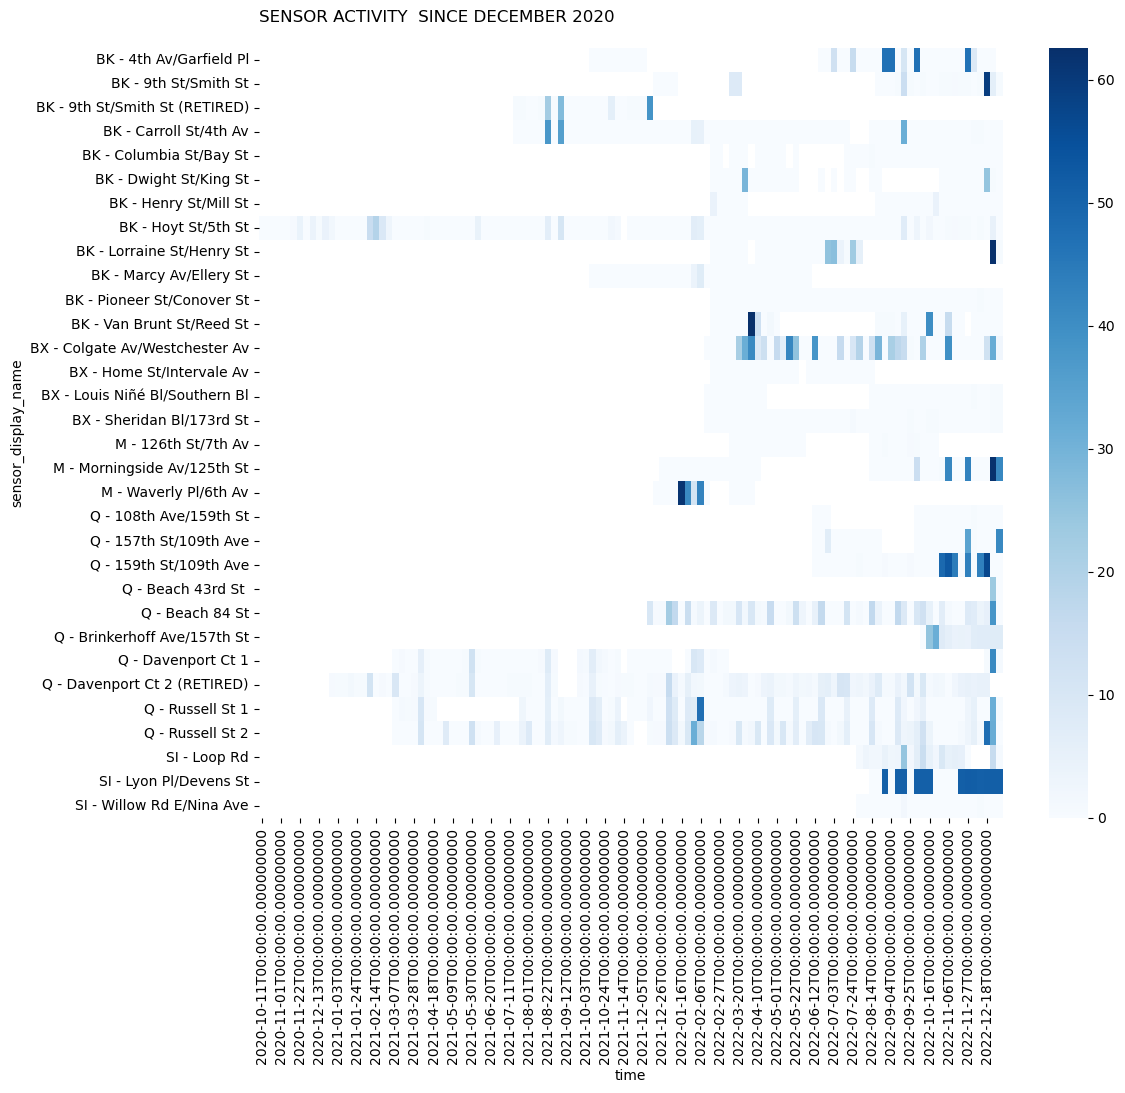

In [74]:
# create a heatmap with locations for all sensors

import matplotlib.pyplot as plt
# create pivot table of sensor data to chart a time series
# aggfunc= len aggregates number of records per week
# I want to see time series of deepest measures instead so will use aggfunc='max
""" #pt = pd.pivot_table(
    data = rh_limited[ rh_limited[['depth_inches']].sum(axis=1) >= 0 ],
    index = 'sensor_display_name',
    columns=pd.Grouper(key='time', freq='w'),
    aggfunc=len,
    values  = 'depth_inches'
) """
pt = pd.pivot_table(
data = df_nta[df_nta[['depth_inches']].sum(axis=1) >= 0 ],
    index = 'sensor_display_name',
    columns = pd.Grouper(key='time', freq='w'),
    aggfunc='max',
    values  = 'depth_inches'
)
# I want the text in the plot to be editable, not outined
plt.rcParams['svg.fonttype'] = 'none' # this worked in illustrator, 
# this might be more standard though (and didn't work today - 1-31-23): 
#plt.rcParams['pdf.fonttype'] = 42

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    data = pt,
    cmap="Blues"
)
# title
title = 'Sensor activity  since December 2020\n'.upper()
plt.title(title, loc='left')
plt.savefig("/Users/saraeichner/Dropbox/FloodWatch_Repo/Design/plots/NYC_sensoractivity_2-6-23.svg") 
plt.savefig("/Users/saraeichner/Dropbox/FloodWatch_Repo/Design/plots/NYC_sensoractivity_2-6-23.jpg") 




In [75]:
rh_allrecords.dropna(inplace = True)
#rh_allrecords['depth_inches']=rh_allrecords.depth_filt_mm/25.4
rh_allrecords.tail()

/var/folders/hp/h4yyw17s7rbgznljt5_q4py80000gn/T/ipykernel_9279/646274177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rh_allrecords.dropna(inplace = True)


time        deployment_id  depth_filt_mm  \
8470508 2022-09-30 23:59:07.967000+00:00  evenly_divine_dingo            0.0   
8470515 2022-09-30 23:59:34.646000+00:00   jolly_tender_squid            0.0   
8470517 2022-09-30 23:59:39.420000+00:00  overly_heroic_squid            0.0   
8470519 2022-09-30 23:59:43.387000+00:00     daily_new_falcon            0.0   
8470524 2022-09-30 23:59:59.848000+00:00  vastly_saving_whale            0.0   

         depth_proc_mm  depth_inches        sensor_display_name NTA2020  \
8470508            0.0           0.0  BK - Van Brunt St/Reed St  BK0601   
8470515            0.0           0.0      BK - Henry St/Mill St  BK0601   
8470517            0.0           0.0       BK - 9th St/Smith St  BK0601   
8470519            0.0           0.0        BK - Hoyt St/5th St  BK0601   
8470524            0.0           0.0    BK - Columbia St/Bay St  BK0601   

                                              NTAName  
8470508  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
8470515  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
8470517  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
8470519  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
8470524  Carroll Gardens-Cobble Hill-Gowanus-Red Hook

In [76]:
# make a heatmap of all flood activity after october 2021
start_date = '2021-10-01 00:00:00.000000000'
end_date = '2022-12-31 00:00:00.000000000'
#start_date = rh_allrecords.to_datetime(start_date)
#end_date = rh_allrecords.to_datetime(end_date)

rh_limited = rh_allrecords[rh_allrecords['time'].between(start_date, end_date)]
# Convert start / end dates to datetime
rh_limited.head()

time         deployment_id  depth_filt_mm  \
25555 2022-02-01 09:07:59.298810+00:00  weekly_poetic_guinea          100.0   
25591 2022-02-01 09:12:12.220181+00:00  weekly_poetic_guinea           90.0   
25654 2022-02-01 09:19:33.707295+00:00  weekly_poetic_guinea           90.0   
25897 2022-02-01 09:52:23.462312+00:00  weekly_poetic_guinea           90.0   
26023 2022-02-01 10:10:24.062232+00:00  weekly_poetic_guinea           90.0   

       depth_proc_mm  depth_inches     sensor_display_name NTA2020  \
25555          100.0           3.9  BK - Carroll St/4th Av  BK0601   
25591           90.0           3.5  BK - Carroll St/4th Av  BK0601   
25654           90.0           3.5  BK - Carroll St/4th Av  BK0601   
25897           90.0           3.5  BK - Carroll St/4th Av  BK0601   
26023           90.0           3.5  BK - Carroll St/4th Av  BK0601   

                                            NTAName  
25555  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
25591  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
25654  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
25897  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
26023  Carroll Gardens-Cobble Hill-Gowanus-Red Hook

In [193]:
df[df['depth_inches']==df['depth_inches'].max()] 

time        deployment_id  depth_filt_mm  \
7249570 2022-04-01 13:38:30.120995+00:00  evenly_divine_dingo         1590.0   

         depth_proc_mm  depth_inches  
7249570         1590.0          62.6

In [194]:
# look at the deepest measures -- they are very high, are these errors? 
# #rh_limited[rh_limited['depth_inches']== rh_limited['depth_inches'].max()]  # 62.6 ,BK - Van Brunt St/Reed St, 2022-04-01
rh_limited.nlargest(10,'depth_inches')

time        deployment_id  depth_filt_mm  \
7249570 2022-04-01 13:38:30.120995+00:00  evenly_divine_dingo         1590.0   
3755736 2022-12-22 13:18:02.514000+00:00     early_still_frog         1579.0   
3591859 2022-12-15 22:35:12.212000+00:00  overly_heroic_squid         1508.0   
3591729 2022-12-15 22:27:51.304000+00:00  overly_heroic_squid         1506.0   
3591748 2022-12-15 22:28:54.397000+00:00  overly_heroic_squid         1505.0   
3591765 2022-12-15 22:29:57.281000+00:00  overly_heroic_squid         1506.0   
3591786 2022-12-15 22:31:00.096000+00:00  overly_heroic_squid         1507.0   
3591804 2022-12-15 22:32:03.468000+00:00  overly_heroic_squid         1507.0   
3591824 2022-12-15 22:33:06.340000+00:00  overly_heroic_squid         1506.0   
3591841 2022-12-15 22:34:09.365000+00:00  overly_heroic_squid         1506.0   

         depth_proc_mm  depth_inches        sensor_display_name NTA2020  \
7249570         1590.0          62.6  BK - Van Brunt St/Reed St  BK0601   
3755736         1579.0          62.2  BK - Lorraine St/Henry St  BK0601   
3591859         1508.0          59.4       BK - 9th St/Smith St  BK0601   
3591729         1506.0          59.3       BK - 9th St/Smith St  BK0601   
3591748         1505.0          59.3       BK - 9th St/Smith St  BK0601   
3591765         1506.0          59.3       BK - 9th St/Smith St  BK0601   
3591786         1507.0          59.3       BK - 9th St/Smith St  BK0601   
3591804         1507.0          59.3       BK - 9th St/Smith St  BK0601   
3591824         1506.0          59.3       BK - 9th St/Smith St  BK0601   
3591841         1506.0          59.3       BK - 9th St/Smith St  BK0601   

                                              NTAName  
7249570  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
3755736  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
3591859  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
3591729  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
3591748  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
3591765  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
3591786  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
3591804  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
3591824  Carroll Gardens-Cobble Hill-Gowanus-Red Hook  
3591841  Carroll Gardens-Cobble Hill-Gowanus-Red Hook

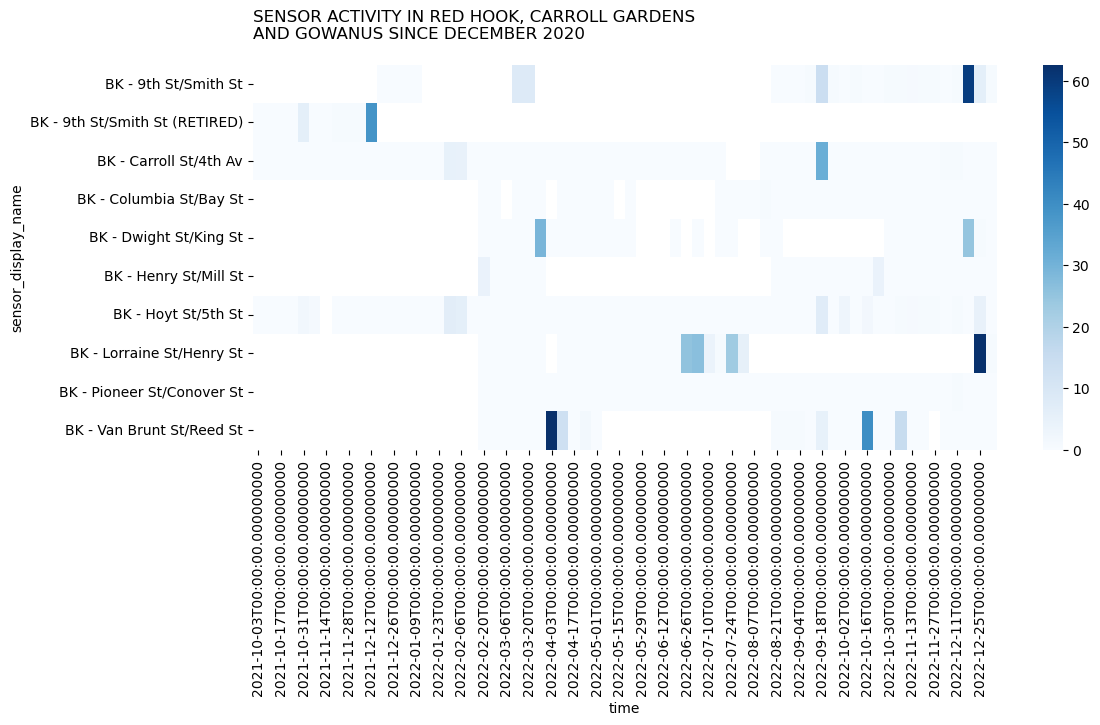

In [77]:
import matplotlib.pyplot as plt
# create pivot table of sensor data to chart a time series
# aggfunc= len aggregates number of records per week
# I want to see time series of deepest measures instead so will use aggfunc='max
pt = pd.pivot_table(
data = rh_limited[ rh_limited[['depth_inches']].sum(axis=1) >= 0 ],
    index = 'sensor_display_name',
    columns = pd.Grouper(key='time', freq='w'),
    aggfunc='max',
    values  = 'depth_inches'
)
# I want the text in the plot to be editable, not outined
plt.rcParams['svg.fonttype'] = 'none' # this worked in illustrator, 
# this might be more standard though (and didn't work today - 1-31-23): 
#plt.rcParams['pdf.fonttype'] = 42

fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(
    data = pt,
    cmap="Blues"
)
# title
title = 'Sensor activity in Red Hook, Carroll Gardens \nand Gowanus since December 2020\n'.upper()
plt.title(title, loc='left')
plt.savefig("/Users/saraeichner/Dropbox/FloodWatch_Repo/Design/plots/redhook_sensoractivity_1-31-23.svg") 
#ax = sns.heatmap
#   ticklabels = [data.index[int(tick)].strftime('%Y-%m-%d') for tick in ax.get_yticks()]
#ax.xaxis.set_ticklabels([d.strftime('%d-%b') for d in covid_matrix.columns[ax.get_xticks().astype(int)]])

## create pluto subset for local maps and reports
1. subset or select only NTAs where there has been flooding
2. buffer by 1/2 mile (not necessary?)
3. load in map pluto 2022
4. select all in the NTA / buffer polygons 
5. join NTA name to all tax lots within the selection
6. remove unecessary columns from pluto 
7. save the tax lot subset with flood incident NTA names

In [125]:
pl = gpd.read_file('/Users/saraeichner/Dropbox/TASC_Sara/Data/nyc_mappluto_22v1_shp/MapPLUTO.shp')

In [127]:
pd.set_option("display.max_columns",None)

In [128]:
pl.head()

Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010 SchoolDist  \
0      BK      2    3  101  1000900         None      9   None       None   
1      MN      1  201    0  1000100         None      1   None       None   
2      MN      2    2  101  1000900  10009001022      9   1025         02   
3      MN      3    1  101  1001300  10013002002     13   2005         02   
4      MN      3   10  101  1031900  10319001006    319   1003         02   

   Council  ZipCode FireComp  PolicePrct  HealthCent  HealthArea Sanitboro  \
0        1        0     None           0           0           0      None   
1        0    10004     None           1          15        8200      None   
2        1    10004     L015           1          15        7700         1   
3        1    10004     E010           1          15        7700         1   
4        1    10004     L015           1          15        9000         1   

  SanitDistr SanitSub          Address ZoneDist1 ZoneDist2 ZoneDist3  \
0       None     None  MARGINAL STREET      C4-6      None      None   
1       None     None   1 ELLIS ISLAND      None      None      None   
2         01       1B  10 SOUTH STREET      C4-6      None      None   
3         01       1A  10 BATTERY PARK      PARK      None      None   
4         01       1A   1 SOUTH STREET      M1-4      None      None   

  ZoneDist4 Overlay1 Overlay2 SPDist1 SPDist2 SPDist3 LtdHeight SplitZone  \
0      None     None     None      LM    None    None      None         N   
1      None     None     None    None    None    None      None      None   
2      None     None     None      LM    None    None      None         N   
3      None     None     None    None    None    None      None         N   
4      None     None     None      LM    None    None      None         N   

  BldgClass LandUse  Easements OwnerType  \
0        Y7      07          0         C   
1        Z9    None          0         X   
2        Y7      07          0         C   
3        Q1      09          0         C   
4        O2      05          0         X   

                                   OwnerName  LotArea  BldgArea  ComArea  \
0  NYC DEPARTMENT OF SMALL BUSINESS SERVICES    38800      7500     7500   
1                      U S GOVT LAND & BLDGS  2764190    603130   603130   
2                        10 SOUTH STREET LLC   191502    158197   158197   
3                             NYC PARKS DEPT   945425    945425   945425   
4                      UNITED STATES AMERICA   123800    123800   123800   

   ResArea  OfficeArea  RetailArea  GarageArea  StrgeArea  FactryArea  \
0        0           0           0           0          0           0   
1        0           0           0           0          0           0   
2        0           0           0           0          0           0   
3        0           0           0           0          0           0   
4        0      123800           0           0          0           0   

   OtherArea AreaSource  NumBldgs  NumFloors  UnitsRes  UnitsTotal  LotFront  \
0       7500          2         1        1.0         0           0     91.90   
1     603130          2        13        0.0         0           0      0.00   
2     158197          2         1        5.0         0           1    311.61   
3     945425          2         9        1.0         0           4    323.00   
4          0          2         1        3.0         0           1    362.00   

   LotDepth  BldgFront  BldgDepth   Ext ProxCode IrrLotCode LotType BsmtCode  \
0    564.56       50.0       75.0  None        0          N       2        5   
1      0.00        0.0        0.0     N        0          N       5        0   
2    555.84      205.0      270.0     N        0          Y       2        0   
3   1260.00       89.0       57.0     N        1          Y       1        0   
4    177.33       37.0      227.0     N        1          Y       2        0   

    AssessLand    AssessTot    ExemptTot  YearBuilt

In [129]:
print(pl.columns.to_list())

['Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020', 'CT2010', 'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthCent', 'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL', 'CondoNo', 'Tract2010', 'XCoord', 'YCoord', 'ZoneMap', 'ZMCode', 'Sanborn', 'TaxMap', 'EDesigNum', 'APPBBL', 'APPDa

In [131]:
cols = ['Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020', 'CT2010', 'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'BldgClass', 'LandUse', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',  'IrrLotCode', 'LotType', 'BsmtCode', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL', 'CondoNo', 'Tract2010', 'XCoord', 'YCoord', 'ZoneMap', 'ZMCode',  'Latitude', 'Longitude', 'geometry' ]
pl = pl[cols]
pl.head(3)

Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010 SchoolDist  \
0      BK      2    3  101  1000900         None      9   None       None   
1      MN      1  201    0  1000100         None      1   None       None   
2      MN      2    2  101  1000900  10009001022      9   1025         02   

   Council  ZipCode BldgClass LandUse OwnerType  \
0        1        0        Y7      07         C   
1        0    10004        Z9    None         X   
2        1    10004        Y7      07         C   

                                   OwnerName  LotArea  BldgArea  ComArea  \
0  NYC DEPARTMENT OF SMALL BUSINESS SERVICES    38800      7500     7500   
1                      U S GOVT LAND & BLDGS  2764190    603130   603130   
2                        10 SOUTH STREET LLC   191502    158197   158197   

   ResArea  NumBldgs  NumFloors  UnitsRes  UnitsTotal  LotFront  LotDepth  \
0        0         1        1.0         0           0     91.90    564.56   
1        0        13        0.0         0           0      0.00      0.00   
2        0         1        5.0         0           1    311.61    555.84   

  IrrLotCode LotType BsmtCode  YearBuilt  YearAlter1  YearAlter2  \
0          N       2        5       1900           0           0   
1          N       5        0       1900           0           0   
2          Y       2        0       1900        2001           0   

                         HistDist             Landmark  BuiltFAR  ResidFAR  \
0                            None                 None      0.19      10.0   
1  Ellis Island Historic District    INTERIOR LANDMARK      0.22       0.0   
2                            None  INDIVIDUAL LANDMARK      0.83      10.0   

   CommFAR  FacilFAR  BoroCode           BBL  CondoNo Tract2010  XCoord  \
0      3.4      10.0         1  1.000020e+09        0      0009  981224   
1      0.0       0.0         1  1.000010e+09        0      0001  972790   
2      3.4      10.0         1  1.000020e+09        0      0009  981037   

   YCoord ZoneMap ZMCode   Latitude  Longitude  \
0  194590     12b   None  40.700781 -74.010913   
1  193648     12b   None  40.698188 -74.041329   
2  194506     12b   None  40.700550 -74.011588   

                                            geometry  
0  MULTIPOLYGON (((981181.986 194636.545, 981176....  
1  POLYGON ((973648.661 193712.461, 973648.066 19...  
2  POLYGON ((980915.002 194319.141, 980795.371 19...

In [135]:
# subset ntas to ones with flood incidents
#ntas['total_flood_count'].value_counts()
ntas['flood_reported_nta']=np.where(ntas['total_flood_count']>0,1,0)
ntas.head(2)

BoroCode  BoroName CountyFIPS NTA2020       NTAName NTAAbbrev NTAType  \
0         3  Brooklyn        047  BK0101    Greenpoint     Grnpt       0   
1         3  Brooklyn        047  BK0102  Williamsburg  Wllmsbrg       0   

  CDTA2020                                        CDTAName    Shape_Leng  \
0     BK01  BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28914.355027   
1     BK01  BK01 Williamsburg-Greenpoint (CD 1 Equivalent)  28155.614845   

     Shape_Area  depth_in_count  depth_in_max  depth_in_sum  depth_in_mean  \
0  3.532200e+07               0           NaN           NaN            NaN   
1  2.886227e+07               0           NaN           NaN            NaN   

   size_count  size_max  size_sum  size_mean  neighborho_count  \
0           0       NaN       NaN        NaN                 0   
1           0       NaN       NaN        NaN                 0   

   total_flood_count        labels  \
0                  0    Greenpoint   
1                  0  Williamsburg   

                                            geometry  flood_reported_nta  
0  MULTIPOLYGON (((-8230087.507 4972327.577, -823...                   0  
1  MULTIPOLYGON (((-8232982.810 4971775.953, -823...                   0

In [136]:
# subset to only flood reported areas
ntaf=ntas [(ntas['flood_reported_nta'] == 1)]
print(len(ntaf))

29


In [137]:
# create subset of nta data to join to pluto 
print(ntaf.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['BoroCode', 'BoroName', 'CountyFIPS', 'NTA2020', 'NTAName', 'NTAAbbrev',
       'NTAType', 'CDTA2020', 'CDTAName', 'Shape_Leng', 'Shape_Area',
       'depth_in_count', 'depth_in_max', 'depth_in_sum', 'depth_in_mean',
       'size_count', 'size_max', 'size_sum', 'size_mean', 'neighborho_count',
       'total_flood_count', 'labels', 'geometry', 'flood_reported_nta'],
      dtype='object')>


In [143]:
cols = ['CountyFIPS','NTA2020','NTAName', 'NTAAbbrev','labels','geometry','flood_reported_nta']
ntaf2 = ntaf[cols]
ntaf2.head(2)


CountyFIPS NTA2020                     NTAName   NTAAbbrev  \
9         047  BK0301   Bedford-Stuyvesant (West)     BdSty_W   
17        047  BK0504  Spring Creek-Starrett City  SpCrk_StrC   

                        labels  \
9                   Bed Stuy W   
17  Spring Creek-Starrett City   

                                             geometry  flood_reported_nta  
9   MULTIPOLYGON (((-8231424.164 4964996.909, -823...                   1  
17  MULTIPOLYGON (((-8225206.297 4960372.123, -822...                   1

In [144]:
ntaf2 = ntaf2.to_crs(2263)

In [145]:
 # join nta_j ids, names, etc to sensor_stats
pl_nta = gpd.sjoin(pl,ntaf2)
pl_nta.head(3)
#puma_index = puma_index[['BBL','puma']]

Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010 SchoolDist  \
4486      MN    527    1  102  1006700  10067002004     67   2004         02   
4488      MN    527    4  102  1006700  10067002004     67   2004         02   
4490      MN    527    6  102  1006700  10067002004     67   2004         02   

      Council  ZipCode BldgClass LandUse OwnerType       OwnerName  LotArea  \
4486        3    10014        C0      02      None  CALABRIA LUIGI     1700   
4488        3    10014        C0      02      None   8 BEDFORD LLC     1667   
4490        3    10014        C0      02      None  WALDMAN STUART     1907   

      BldgArea  ComArea  ResArea  NumBldgs  NumFloors  UnitsRes  UnitsTotal  \
4486      3328        0     3328         1        4.0         3           3   
4488      3260        0     3260         1        4.0         3           3   
4490      2280        0     2280         1        3.0         3           3   

      LotFront  LotDepth IrrLotCode LotType BsmtCode  YearBuilt  YearAlter1  \
4486     22.75    100.00          Y       5        2       1829           0   
4488     22.00     75.75          N       5        2       1829           0   
4490     19.08     99.92          N       5        2       1830           0   

      YearAlter2                                          HistDist Landmark  \
4486           0  Greenwich Village Historic District Extension II     None   
4488           0  Greenwich Village Historic District Extension II     None   
4490           0  Greenwich Village Historic District Extension II     None   

      BuiltFAR  ResidFAR  CommFAR  FacilFAR  BoroCode           BBL  CondoNo  \
4486      1.96      3.44      0.0       6.5         1  1.005270e+09        0   
4488      1.96      2.43      0.0       4.8         1  1.005270e+09        0   
4490      1.20      2.43      0.0       4.8         1  1.005270e+09        0   

     Tract2010  XCoord  YCoord ZoneMap ZMCode   Latitude  Longitude  \
4486      0067  983377  204825     12a   None  40.728874 -74.003150   
4488      0067  983346  204867     12a   None  40.728989 -74.003262   
4490      0067  983347  204909     12a   None  40.729104 -74.003258   

                                               geometry  index_right  \
4486  POLYGON ((983357.021 204781.670, 983347.951 20...          123   
4488  POLYGON ((983384.363 204886.117, 983324.990 20...          123   
4490  POLYGON ((983390.355 204941.282, 983397.391 20...          123   

     CountyFIPS NTA2020       NTAName NTAAbbrev        labels  \
4486        061  MN0203  West Village    WstVlg  West Village   
4488        061  MN0203  West Village    WstVlg  West Village   
4490        061  MN0203  West Village    WstVlg  West Village   

      flood_reported_nta  
4486                   1  
4488                   1  
4490                   1

In [146]:
print(len(pl_nta))
print(len(pl))

134503
857006


(-8263186.8199138045, -8205879.074097234, 4942466.248144575, 4998574.84596008)

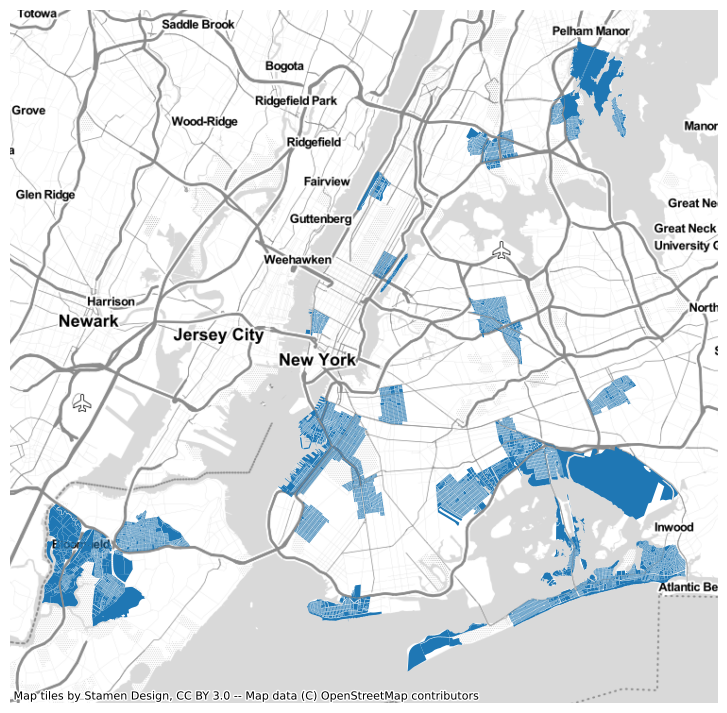

In [150]:
# ax = sensor_measures.to_crs(3857).plot
ax = pl_nta.to_crs(3857).plot(figsize=(19, 9))
cx.add_basemap( ax, source=cx.providers.Stamen.TonerLite  )
ax.axis('off')

In [213]:
print(pl_nta['NTAName'].unique())

['West Village' 'Upper East Side-Lenox Hill-Roosevelt Island'
 'Morningside Heights' 'Crotona Park East'
 'Soundview-Bruckner-Bronx River' 'Pelham Bay-Country Club-City Island'
 'Pelham Bay Park' 'Carroll Gardens-Cobble Hill-Gowanus-Red Hook'
 'Sunset Park (West)' 'Windsor Terrace-South Slope' 'Park Slope'
 'Bedford-Stuyvesant (West)' 'East New York-City Line'
 'Spring Creek-Starrett City' 'Howard Beach-Lindenwood'
 'Flatbush (West)-Ditmas Park-Parkville' 'Kensington' 'Dyker Heights'
 'Coney Island-Sea Gate' 'Canarsie' 'Elmhurst' 'Rego Park' 'South Jamaica'
 'Spring Creek Park'
 'Breezy Point-Belle Harbor-Rockaway Park-Broad Channel'
 'Far Rockaway-Bayswater' 'Rockaway Beach-Arverne-Edgemere'
 'Westerleigh-Castleton Corners'
 'New Springville-Willowbrook-Bulls Head-Travis']


(-8240087.972860851, -8235174.583558756, 4962792.388373903, 4967531.182811154)

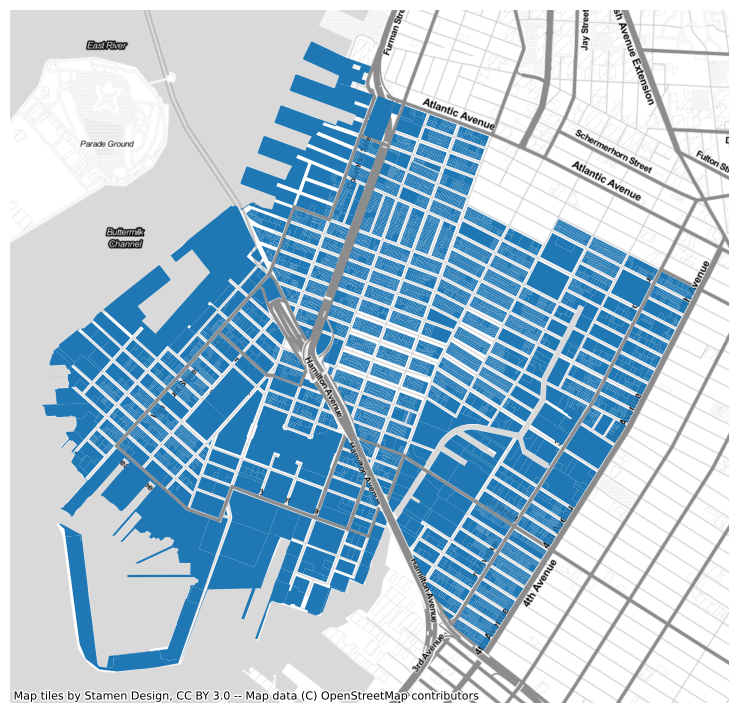

In [208]:
# make a map of one nta
rh_lots = pl_nta[(pl_nta['NTAName'] == 'Carroll Gardens-Cobble Hill-Gowanus-Red Hook')]
ax = rh_lots.to_crs(3857).plot(figsize=(19, 9))
cx.add_basemap( ax, source=cx.providers.Stamen.TonerLite  )
ax.axis('off')

(-8256829.884400549, -8210526.990042975, 4950474.134591788, 4989607.572848657)

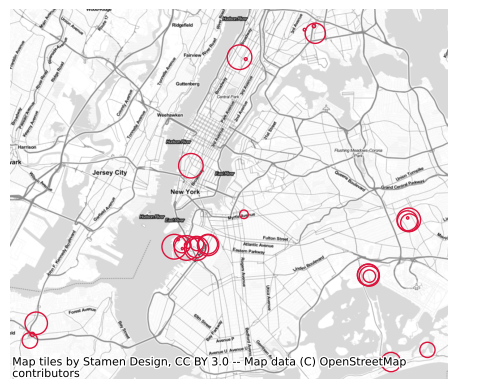

In [210]:
deepest_measures = sensor_locations.join( max_depth2.set_index("deployment_id") , on='deployment_id' )

sensor_maxdepths = gpd.GeoDataFrame(
    data = deepest_measures,
    geometry=gpd.points_from_xy( sensor_locations['lon'],sensor_locations['lat'] ),
    crs = 4326
)

ax = sensor_maxdepths.to_crs(3857).plot( markersize = sensor_maxdepths2['depth']/5 , edgecolor = 'crimson' , facecolor ='none' , lw = 1 )
cx.add_basemap( ax, source=cx.providers.Stamen.TonerLite  )
ax.axis('off')

In [214]:
deepest_measures.head()

sensor_display_name         deployment_id        lat        lon  \
1         BK - 4th Av/Garfield Pl   daily_gentle_beetle  40.675855 -73.983944   
2  BK - 9th St/Smith St (RETIRED)   widely_proud_lizard  40.673654 -73.995396   
3            BK - 9th St/Smith St   overly_heroic_squid  40.673401 -73.994892   
4          BK - Carroll St/4th Av  weekly_poetic_guinea  40.676281 -73.984089   
5         BK - Columbia St/Bay St   vastly_saving_whale  40.673267 -74.008418   

                     geometry      date   depth  
1  POINT (-73.98394 40.67585)  31-12-22  1190.0  
2  POINT (-73.99540 40.67365)  31-12-22   978.0  
3  POINT (-73.99489 40.67340)  31-12-22  1508.0  
4  POINT (-73.98409 40.67628)  31-12-22   958.0  
5  POINT (-74.00842 40.67327)  31-12-22    12.0

In [212]:
print(sensor_maxdepths.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['sensor_display_name', 'deployment_id', 'lat', 'lon', 'geometry',
       'date', 'depth'],
      dtype='object')>


In [ ]:
# subset sensor_maxdepths to redhook


In [151]:
# save pluto tax lots falling within ntas with flood history as subset
pl_nta.to_file('/Users/saraeichner/Dropbox/FloodWatch_Repo/data/pluto/pluto_2022_ntas_w_floodhistory.geojson', driver="GeoJSON",encoding = 'utf-8')

In [215]:
rh_lots.head()

Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010 CB2010  \
127377      BK    284   25  306  3004900  30049001000     49   1000   
127379      BK    285   18  306  3004500  30045001001     45   1001   
127381      BK    285   21  306  3004500  30045001001     45   1001   
127382      BK    285   25  306  3004500  30045001001     45   1001   
127384      BK    285   26  306  3004500  30045001001     45   1001   

       SchoolDist  Council  ZipCode BldgClass LandUse OwnerType  \
127377         15       39    11201        C7      04      None   
127379         15       39    11201        S3      04      None   
127381         15       39    11201        S3      04      None   
127382         15       39    11201        S3      04      None   
127384         15       39    11201        C1      02      None   

                          OwnerName  LotArea  BldgArea  ComArea  ResArea  \
127377                  FXS-HM INC.     3375     11490     3200     8290   
127379           138 ATLANTIC,  LLC     1693      5775     2310     3465   
127381         144 ATLANTIC AVE LLC     1680      4620     1155     3465   
127382               ARBEENY, PETER     1733      5460     1408     4052   
127384  154 ATLANTIC PROPERTIES LLC     1733      5460        0     5460   

        NumBldgs  NumFloors  UnitsRes  UnitsTotal  LotFront  LotDepth  \
127377         1        4.0         9          12     37.50      90.0   
127379         1        4.0         3           4     21.00      80.0   
127381         1        4.0         3           4     21.00      80.0   
127382         1        4.0         3           4     21.67      80.0   
127384         1        4.0         8           8     21.67      80.0   

       IrrLotCode LotType BsmtCode  YearBuilt  YearAlter1  YearAlter2  \
127377          N       3        2       1904        1985           0   
127379          N       5        5       1852        1984           0   
127381          N       5        5       1852        1989           0   
127382          N       5        5       1852        1986           0   
127384          Y       5        2       1852        1987           0   

                             HistDist Landmark  BuiltFAR  ResidFAR  CommFAR  \
127377  Cobble Hill Historic District     None      3.40      2.43      0.0   
127379  Cobble Hill Historic District     None      3.41      2.43      0.0   
127381  Cobble Hill Historic District     None      2.75      2.43      0.0   
127382  Cobble Hill Historic District     None      3.15      2.43      0.0   
127384  Cobble Hill Historic District     None      3.15      2.43      0.0   

        FacilFAR  BoroCode           BBL  CondoNo Tract2010  XCoord  YCoord  \
127377       4.8         3  3.002840e+09        0      0049  985223  190866   
127379       4.8         3  3.002850e+09        0      0045  985558  190751   
127381       4.8         3  3.002850e+09        0      0045  985617  190730   
127382       4.8         3  3.002850e+09        0      0045  985697  190701   
127384       4.8         3  3.002850e+09        0      0045  985718  190693   

       ZoneMap ZMCode   Latitude  Longitude  \
127377     16c   None  40.690560 -73.996491   
127379     16c   None  40.690244 -73.995283   
127381     16c   None  40.690186 -73.995071   
127382     16c   None  40.690107 -73.994782   
127384     16c   None  40.690085 -73.994707   

                                                 geometry  index_right  \
127377  POLYGON ((985221.489 190918.569, 985259.100 19...           20   
127379  POLYGON ((985583.717 190788.534, 985553.914 19...           20   
127381  POLYGON ((985592.118 190693.408, 985621.922 19...           20   
127382  POLYGON ((985722.870 190737.952, 985693.066 19...           20   
127384  POLYGON ((985743.123 190730.590, 985713.320 19...           20   

       CountyFIPS NTA2020                                       NTAName  \
127377        047  BK0601  Carroll Gardens-Cobble Hill-Gowanus-Red Hook   
127379        

In [216]:
# save pluto tax lots falling within ntas with flood history as subset
rh_lots.to_file('/Users/saraeichner/Dropbox/FloodWatch_Repo/data/pluto/redhook_pluto_2022_w_floodhistory.geojson', driver="GeoJSON",encoding = 'utf-8')

## create dataset for statistics by area (NTA for now)
Count of flood incidents:
1. 311 complaints (flood related)
2. flood sensor reports > 4" 
3. flood watch reports 
dates for each: enable counts per season or month
1. complaint date
2. flood sensor indicated date
3. flood watch report date
### using flood sensor data (not ntas): 
aggregate flood counts per year, take average per month? 
- aggregate depth measures and calculate average depth of floods per month and year for each nta
### with pluto data in ntas with flood history: 
use buffered flood sensors (1/2 mile?) to select tax lots and add binary to lots in that zone
- do same with sandy 
- add to tax lot data 
- display tax lots to show lots in flood impact area, sandy area, etc. 
- calculate count of residential units (rather than full tax lots) in area that are affected? 
